In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv('/content/combined-data.csv')

df.head(3)

,Country,1970_co2_total,1971_co2_total,1972_co2_total,1973_co2_total,1974_co2_total,1975_co2_total,1976_co2_total,1977_co2_total,1978_co2_total,...,2012_surface_temperature,2013_surface_temperature,2014_surface_temperature,2015_surface_temperature,2016_surface_temperature,2017_surface_temperature,2018_surface_temperature,2019_surface_temperature,2020_surface_temperature,2021_surface_temperature
0,Angola,8.952570,8.538308,10.388519,11.372301,11.833761,10.930423,7.317385,12.057774,14.239234,...,0.552,1.044,0.828,1.331,1.609,0.870,1.395,1.752,1.162,1.553
1,Anguilla,0.002168,0.002168,0.002264,0.002109,0.002350,0.002584,0.002434,0.002537,0.002902,...,0.640,0.770,0.814,1.051,1.125,0.960,0.664,0.843,1.224,0.893
2,Albania,4.814516,4.814828,5.498804,4.939869,5.319746,5.414438,5.785733,6.197670,6.820001,...,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536


In [ ]:
# g = sns.FacetGrid(data = df, col = "Country")

# co2_columns = df.columns[df.columns.str.contains('_co2_total')]
# temp_columns = df.columns[df.columns.str.contains('_surface_temperature')]

# temp_data = df[co2_columns].astype(float).values.flatten()
# co2_data = df[temp_columns].astype(float).values.flatten()

# # temp_data = list[temp_columns]
# # co2_data = list[co2_columns]


# g.map(sns.scatterplot, co2_data, temp_data)

# plt.show()

In [14]:

enc = OneHotEncoder(handle_unknown = 'ignore')

X1 = df.loc[:][1:52]
X2 = df.loc[:][54:]

X = pd.concat([X1, X2], axis=1)

enc.fit(X)

encoded = enc.fit_transform(X)

encoded_array = encoded.toarray()

encoded_array


array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
enc = OneHotEncoder(handle_unknown='ignore')

co2_concatenated = pd.concat([df.iloc[1:52]], axis = 1)

#enc.fit_transformed(co2_concatenated)

temp_concatenated = pd.concat([df.iloc[54:]], axis =1)

#enc.fit_transformed(temp_concatenated)

X_concatenated = pd.concat([co2_concatenated, temp_concatenated], axis=1)

#enc.fit(X_concatenated)

encoded_matrix = enc.fit_transform(X_concatenated)

In [16]:
encoded_matrix.toarray()

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
# @title Linera Regression

X = df.iloc[:, 1:52]

y = df.iloc[:, 54:]

X_average = X.mean()
y_average = y.mean()


In [84]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_average)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size


rnd_indices = np.random.permutation(total_size)


X_train = X_average.iloc[rnd_indices[:train_size]]
y_train = y_average.iloc[rnd_indices[:train_size]]

X_valid = X_average.iloc[rnd_indices[train_size:train_size+validation_size]]
y_valid = y_average.iloc[rnd_indices[train_size:train_size+validation_size]]

X_test = X_average.iloc[rnd_indices[train_size+validation_size:]]
y_test = y_average.iloc[rnd_indices[train_size+validation_size:]]


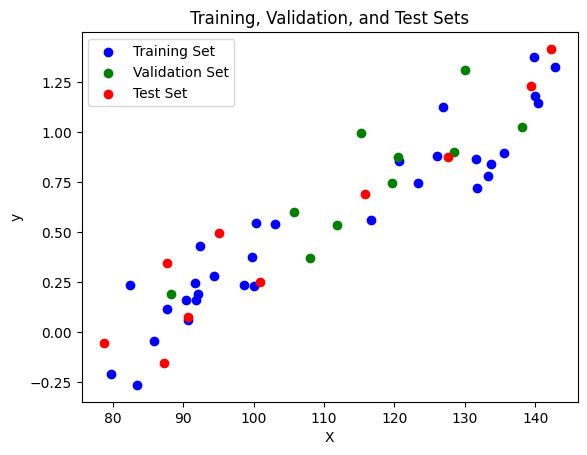

In [85]:
plt.scatter(X_train, y_train, color='blue', label='Training Set')

plt.scatter(X_valid, y_valid, color='green', label='Validation Set')

plt.scatter(X_test, y_test, color='red', label='Test Set')

plt.title('Training, Validation, and Test Sets')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.show()

In [95]:
X_train_reshaped = X_train.values.reshape(-1, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)

linear_regression = LinearRegression()
linear_regression.fit(X_train_reshaped,y_train_reshaped)

y_valid_pred = linear_regression.predict(X_valid.values.reshape(-1, 1))

# Calculate accuracy on the validation set
validation_mse = mean_squared_error(y_valid, y_valid_pred)
print("Validation MSE:", validation_mse)

validation_rmse = np.sqrt(validation_mse)
print("Validation RMSE:", validation_rmse)

# Predict on the test set
y_test_pred = linear_regression.predict(X_test.values.reshape(-1, 1))

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", test_mse)

test_rmse = np.sqrt(test_mse)
print("Test RMSE:", test_rmse)


Validation MSE: 0.03358129088082111
Validation RMSE: 0.18325198738573373
Test MSE: 0.027827539836188225
Test RMSE: 0.1668158860426315


In [96]:
e_2022 = 321
e_2022_reshaped = np.array([[e_2022]])
future_pred = linear_regression.predict(e_2022_reshaped)
future_pred

array([[4.69815669]])

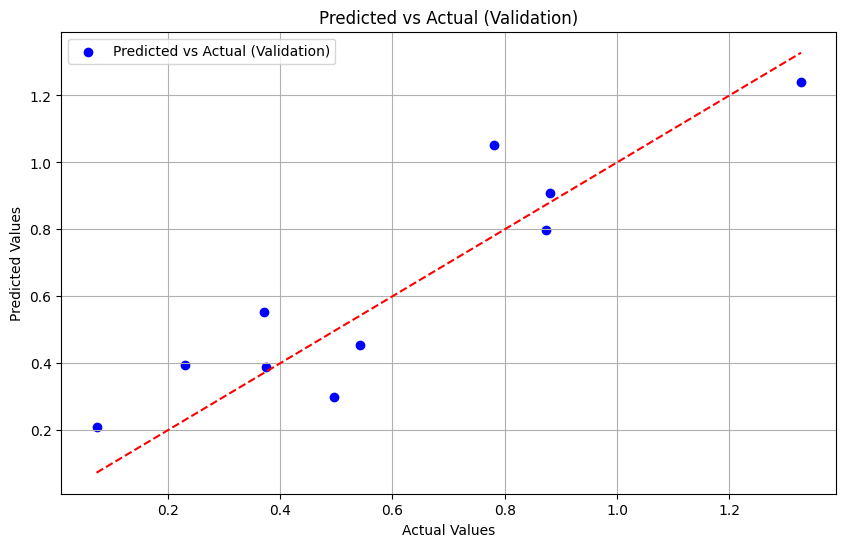

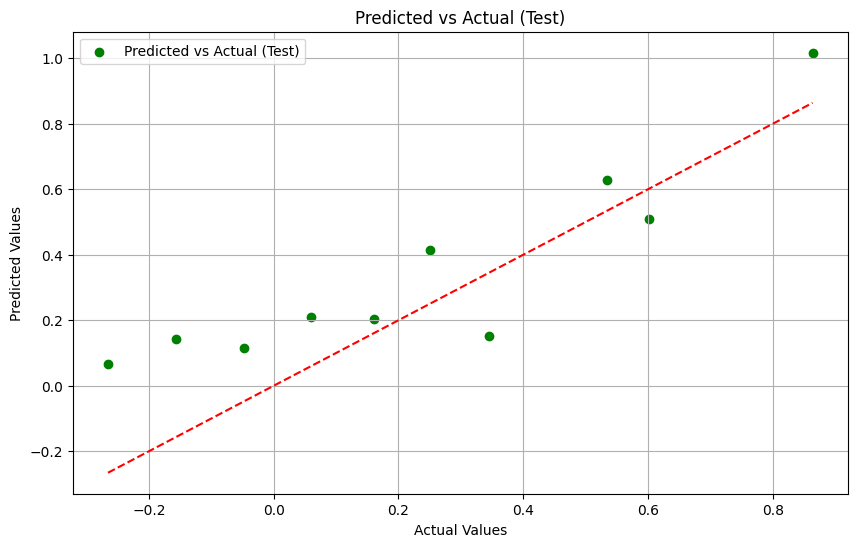

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_valid_pred, color='blue', label='Predicted vs Actual (Validation)')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], '--', color='red')
plt.title('Predicted vs Actual (Validation)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Predicted vs Actual (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Predicted vs Actual (Test)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# outliers in the dataset

In [ ]:
X = df.iloc[:, 1:52]

y = df.iloc[:, 54:]

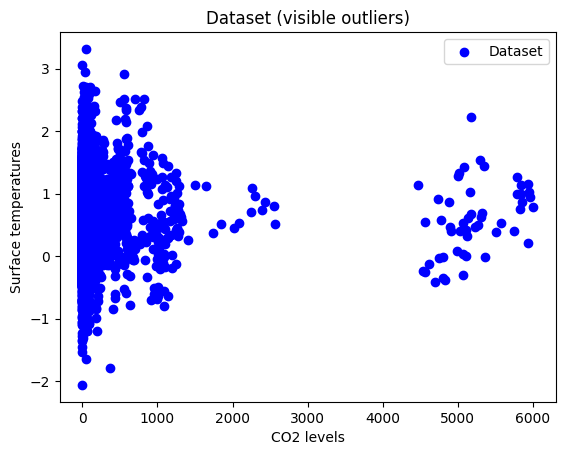

In [55]:
plt.scatter(X, y, color='blue', label='Dataset')

plt.title('Dataset (visible outliers)')
plt.xlabel('CO2 levels')
plt.ylabel('Surface temperatures')
plt.legend()

plt.show()

In [75]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size


rnd_indices = np.random.permutation(total_size)


X_train = X.iloc[rnd_indices[:train_size]]
y_train = y.iloc[rnd_indices[:train_size]]

X_valid = X.iloc[rnd_indices[train_size:train_size+validation_size]]
y_valid = y.iloc[rnd_indices[train_size:train_size+validation_size]]

X_test = X.iloc[rnd_indices[train_size+validation_size:]]
y_test = y.iloc[rnd_indices[train_size+validation_size:]]

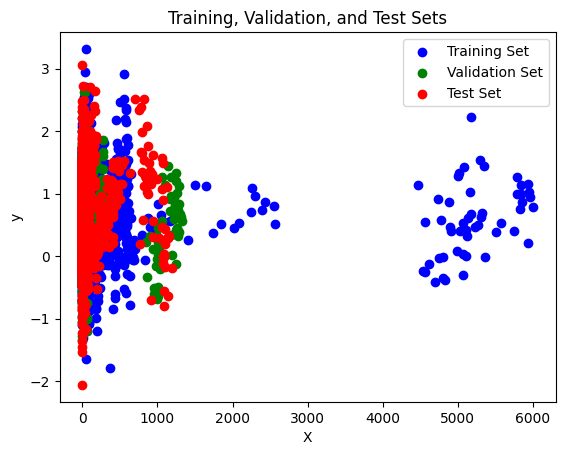

In [76]:
plt.scatter(X_train, y_train, color='blue', label='Training Set')

plt.scatter(X_valid, y_valid, color='green', label='Validation Set')

plt.scatter(X_test, y_test, color='red', label='Test Set')

plt.title('Training, Validation, and Test Sets')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.show()

In [81]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

y_valid_pred = linear_regression.predict(X_valid)

# Calculate accuracy on the validation set
validation_mse = mean_squared_error(y_valid, y_valid_pred)
print("Validation MSE:", validation_mse)

validation_rmse = np.sqrt(validation_mse)
print("Validation RMSE:", validation_rmse)

# Predict on the test set
y_test_pred = linear_regression.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", test_mse)

test_rmse = np.sqrt(test_mse)
print("Test RMSE:", test_rmse)


Validation MSE: 311.72865993345835
Validation RMSE: 17.65583925882478
Test MSE: 77.66121451309183
Test RMSE: 8.812560043091441
